# <u>Data, Metadata and APIs</u>
# <u>Part 1: The Bitmap (.bmp) Image File Format</u>

When we think of a computer file, we think of a certain type of data. A *.jpg* file contains image data, while an *.mp3* file contains sound data. But in reality, many file types store data _about_ the data such as the date that a video (*.mp4*) was recorded, the location a picture was taken (*.jpg*), or the artist performing in a sound file (*.mp3*). Data *about* the data is called **metadata**. 

Let's start with a simple example: a *.bmp* or bitmap file is exactly what it sounds like. It is an image created out of a map of bits (hence, bitmap). But the file also contains some very basic **metadata**. Every bitmap file starts with a 54-byte header that stores some basic information about the file such as its width/height. After these 54 bytes of **metadata**, the rest of the file is image data.

Today, we will go through a refresher on the data stored in an image file such as a *.bmp*, and then tomorrow we'll move on to analyzing the **metadata**.

### <u>How the Data Stored in a Bitmap?</u>

There are a lot of advanced ways to encode and store image data, but a 24-bit bitmap is about as simple as it gets. Just like last semester, we have each pixel stored as 3 bytes. One for red, one for blue, and one for green. For now, assume our ordered triples are in the order [red, green, blue]. The ordered triple [0, 0, 0] would represent black since it represents the absence of any light. The ordered triple [255, 255, 255] is a pure white pixel. This would be the red, blue, and green all showing at maximum intensity, mixing together to display white light. Pure red would be encoded as [255, 0, 0] while pure green is [0, 255, 0]. For colors that are not pure red, blue, or green, you would have a mix of the three colors.

### <u>Review: What color is represented by the given ordered triple?</u>

**<u>Question 1:</u>** What color is a pixel represented by the ordered triple [0, 0, 255]?

**<u>Short Answer:</u>** The color blue

**<u>Question 2:</u>** What color is a pixel represented by the ordered triple [255, 255, 0]?

**<u>Short Answer:</u>** The color yellow

**<u>Question 3:</u>** What color do you think [255, 100, 0] would represent? Use your answer to Question 2 to help you explain your answer. 

**<u>Explain:</u>** The color orange

**<u>Question 4:</u>** The paragraph above, you learned what color [0, 0, 0] is as well as [255, 255, 255]. As a quick review, what colors are these? 

**<u>Short Answer for [0, 0, 0]:</u>** The color black

**<u>Short Answer for [255, 255, 255]:</u>** The color white

**<u>Question 5:</u>** What if you set all three channels to the same number, x, for 0 < x < 255? For example what color would a pixel be described by [100, 100, 100]? 

**<u>Explain:</u>** It would be some form of of darker gray because all of the values are equal to each other which means no color is going to stand out, as well as the color being lower into the 100s. Which means a darker gray.

**<u>Question 6:</u>** In a 24-bit bitmap, each ordered triple maxes out at 255. For example, [0, 255, 100] is a valid pixel while [500, 256, 800] is not. Why do you think this is the case?

**<u>Explain:</u>** Because in a 24 bitmap, the max value of the values are set at 255 out of 256 because 0 is included in the bits.

### <u>A Beautiful Bitmap Image</u>

Let's start with a public domain image with lots of colors in it. This could be a good file to experiment with in order to see how the image data is stored/encoded. 

*Source: https://pixabay.com/en/birthday-bouquet-wildflowers-1540643/*

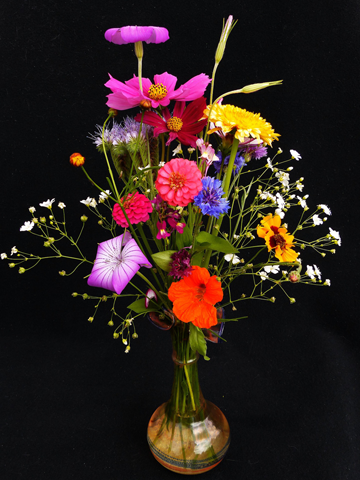

In [2]:
from PIL import Image
img = Image.open("flowers.bmp")
img.save("output/flowers.png",'png')

from IPython.display import Image
Image(filename="output/flowers.png")

A lovely bouquet of wildflowers. Too bad _.bmp_ files can't store olfactory information (yet).

### <u>Image Data</u>

Since a bitmap starts with a 54-byte header (**metadata** that stores information about the file itself such as its width/height), we will make a list of RGB pixels starting after the 54th byte. Each RGB pixel will be stored as a list of three bytes. This list of lists (pixels) is where our raw image data is stored.

*Note: In addition to raw image data, your .bmp may also have some "padding." These are extra bytes added to make sure each row of is nicely divisible by 4 bytes. We will avoid working with padding in this exercise, but if you do some experimentation on your own you may need to may have to deal with padding.*

For now, let's write the bytes of our bitmap into a Python bytearray:

In [3]:
with open("flowers.bmp", 'rb') as original_image:
    original_data = original_image.read()
    original_bytes = bytearray(original_data)

We can see how many bytes are contained in this file:

In [4]:
filesize_bytes = len(original_bytes)

print(filesize_bytes)

518456


This file is 518,456 bytes. 

**<u>Question 7:</u>** What is the size of this file in kilobytes? Answer this question by writingn some code in the cell below:

**<u>Short Answer:</u>** The size of the file is 518.456 kilobytes

In [5]:
# code to find the filesize in kilobytes
filesize_kilobytes = len(original_bytes)/1000

print(filesize_kilobytes)

518.456


Now let's define a function that can take a bitmap byte array as input and returns a file header and a list of pixels as output:

In [6]:
# Summary: Reads a bitmap byte array and return the file header and a list of pixels (RGB triples)
# Parameters: A byte array from a bitmap
# Return: a tuple in the form (bitmap file header, list of pixels as RGB triples)

def bitmap_to_pixels(byte_array):
    pixels_list = []  
    length_of_image_bytes = len(byte_array) - 54 # Read after the 54th byte
    number_of_pixels = length_of_image_bytes//3 # There are 3 bytes per pixel
    header = byte_array[:54] # This is where the metadata is stored
    for i in range(number_of_pixels): 
        b = byte_array[54 + 3*i] # Read the blue byte the starts right after the header, and assign this value to 'b'
        g = byte_array[54 + 3*i + 1] # Read the green byte the starts right after the blue byte, and assign this value to 'g'
        r = byte_array[54 + 3*i + 2] # Read the red byte the starts right after the header, and assign this value to 'r'
        pixel = [r,g,b] # Store the three channels as an RGB list named 'pixel'
        pixels_list.append(pixel) # Append 'pixel' to pixel list
    return header, pixels_list # Return the file header (metadata) and list of pixels (data) as a tuple

This is exciting, let's get a look at the first 10 pixels:

In [7]:
header, pixel_list = bitmap_to_pixels(original_bytes)

print(pixel_list[:10])

[[16, 16, 18], [15, 15, 17], [16, 16, 18], [15, 15, 17], [15, 15, 17], [16, 15, 17], [14, 14, 16], [16, 16, 18], [15, 15, 17], [14, 15, 17]]


These triples represent the first 10 pixels of the .bmp image (starting from the lower-left-hand-corner of the picture). Each value is much closer to 0 than it is to 255, so these pixels probably look nearly black. Now let's see how many pixels are in our pixel_list:

In [8]:
number_of_pixels = len(pixel_list)

print(number_of_pixels)

172800


There are 172,800 pixels in the picture.

Next, if you search through the image, you can find a vibrant yellow pixel with the an RGB value of [255, 213, 1]. I found this pixel by opening the file in Photoshop and using the eyedropper tool (https://www.youtube.com/watch?v=_Np5Hr34Mj4). 

Let's see if we can find the first instance of this color appearing in the image data:

In [9]:
pixel_list.index([255,213,1])

79480

A yellow pixel with the RGB values of [255, 213, 1] appears at pixel number 79,480. This is about halfway through the image file of about 172,800 pixels. This might make sense because the yellow flowers are near the middle of the image if you search through pixel-by-pixel, row-by-row.

Now we can analyze this image in other ways. Let's say that a pixel is "very dark" the RGB triple is in the form [x, y, z] where x < 30, y < 30, and z < 30. For example, the first byte we found in the image, [16, 16, 18], is "very dark" in the sense that each of the RGB-values is so close to zero, the pixel looks pretty much black to the human eye. Let's count how many of these pixels appear in the image:

In [10]:
count_dark_pixels = 0 # Initialize a counter to 0

for pixel in pixel_list:
    if pixel[0] < 30 and pixel[1] < 30 and pixel[2] < 30:
        count_dark_pixels += 1 # Each time you find a match, increment the counter by 1
                
print(count_dark_pixels) # After you are done counting, print out the result

125940


If you want to do this same thing in a more 'Pythonic' fashion, here's another way to get the same result:

In [11]:
sum((pixel[0] < 30 and pixel[1] < 30 and pixel[2] < 30) for pixel in pixel_list)

125940

About 125,940 pixels in this image are "very dark," which is about 73% of the total pixels:

In [12]:
count_dark_pixels/number_of_pixels

0.7288194444444445

### <u>Task #1: How many "pure white" pixels are in the image?</u>

**<u>Your Answer:</u>**

In [13]:
# this finds how many pure white pixels are in the image
pixel_list.index([0,0,0])

58054

### <u>Task #2: What is a numerical criteria for what makes a pixel "colorful" versus "grayish"? Explain your reasoning.</u> 

**<u>Your Answer:</u>** The numerical criteria for "colorful" pixels is for one or two values to be higher or lower than each other, for example [255,0,100]. For "grayish" all the numbers of the rgb value have to be similar to each other, for example: [120,100,110] 

### <u>Task #3: Count the number of pixels in the image that you have deemed "colorful."</u> 

**<u>Your Answer:</u>**

In [25]:
# determine how many "colorful" pixels are in the image
sum((pixel[0] > pixel[1] and pixel[0] > pixel[2] and pixel[1] > pixel[0] and pixel[1] > pixel[2] and pixel[2] > pixel[0] and pixel[2] > pixel[1]) for pixel in pixel_list)
# this finds how many red pixels are in the image
#pixel_list.index([11, 12, 15])
# this finds how many light blue white pixels are in the image
# pixel_list.index([11,11,12])
# this finds how many pure white pixels are in the image
# pixel_list.index([13,13,15])

0

### <u>Task #4: Calculate what percentage of pixels that are "colorful."</u>

**<u>Your Answer:</u>**

In [15]:
# Your code here
pixel_list

[[16, 16, 18],
 [15, 15, 17],
 [16, 16, 18],
 [15, 15, 17],
 [15, 15, 17],
 [16, 15, 17],
 [14, 14, 16],
 [16, 16, 18],
 [15, 15, 17],
 [14, 15, 17],
 [14, 15, 17],
 [16, 17, 19],
 [12, 13, 15],
 [12, 13, 15],
 [13, 14, 16],
 [11, 12, 14],
 [14, 14, 16],
 [16, 16, 18],
 [15, 15, 17],
 [17, 17, 19],
 [15, 16, 18],
 [12, 13, 15],
 [13, 14, 16],
 [12, 13, 15],
 [13, 14, 16],
 [14, 15, 17],
 [12, 13, 15],
 [12, 12, 14],
 [14, 14, 16],
 [16, 16, 18],
 [14, 14, 16],
 [14, 14, 16],
 [15, 16, 18],
 [15, 16, 18],
 [15, 14, 16],
 [16, 16, 18],
 [13, 13, 15],
 [14, 14, 16],
 [13, 15, 17],
 [13, 14, 16],
 [18, 19, 21],
 [15, 16, 18],
 [13, 13, 15],
 [14, 14, 16],
 [15, 15, 17],
 [14, 14, 16],
 [14, 14, 16],
 [14, 14, 16],
 [14, 14, 16],
 [16, 16, 18],
 [15, 16, 18],
 [13, 14, 16],
 [14, 15, 17],
 [13, 14, 16],
 [13, 14, 16],
 [14, 15, 17],
 [14, 14, 16],
 [14, 14, 16],
 [14, 14, 16],
 [16, 16, 18],
 [15, 15, 17],
 [17, 17, 19],
 [16, 16, 18],
 [16, 16, 18],
 [15, 14, 16],
 [13, 13, 15],
 [14, 14, 